In [12]:
# imports de bibliotecas

import numpy as np
import mne
from scipy.signal import welch
import matplotlib.pyplot as plt

In [13]:
#  definição do info (MNE)

n_channels = 8
ch_types = ['eeg'] * n_channels
sfreq = 250
ch_names = ["F3", "Fz", "F4", "C3", "Cz", "C4", "P3", "P4"]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage("standard_1020")

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,11 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [14]:
#  definição do info (MNE)

n_channels = 8
ch_types = ['eeg'] * n_channels
sfreq = 250
ch_names = ["F3", "Fz", "F4", "C3", "Cz", "C4", "P3", "P4"]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage("standard_1020")

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,11 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [15]:
# aula -> 99750 até 296500 (ga1) | 5250 até 119250 (ga2) [1243 segundos]
# teste -> 126750 até 158000 (ga2) [125 segundos]
tf = [
  # '../dataset/OpenBCI-RAW-2023-11-28_15-44-34.txt', # REMOVE:(15-16) (60-67) (111-114)
  # '../dataset/OpenBCI-RAW-2023-11-28_15-50-35.txt', # REMOVE:(14-16) (96-99)
  '../dataset/OpenBCI-RAW-2023-11-28_15-53-44.txt'  # REMOVE:(00-37)
  ]

tf_ob = [np.loadtxt(txt, delimiter=',', skiprows=5, usecols=range(1, 9)) for txt in tf]

data_tf = tf_ob[0][38*sfreq:,:]
# data_tf = np.concatenate((
  # tf_ob[0][17*sfreq:59*sfreq,:], tf_ob[0][68*sfreq:110*sfreq,:], tf_ob[0][115*sfreq:,:], # 17-59, 68-110, 115-248(final) = 217
  # tf_ob[1][17*sfreq:95*sfreq,:], tf_ob[1][100*sfreq:,:], # 17-95, 100-143(final) = 121
  # tf_ob[0][38*sfreq:,:] #38-318(final) = 280  @ MOMENTO EM QUE O BETA ESTÁ ALTO: 4:16 - 4:22 = 256 - 262
# ))


x_tf = mne.io.RawArray(data_tf.T, info)
print('BEFORE: ',x_tf.get_data().shape)
x_tf.set_eeg_reference(ref_channels='average') # CAR
print('AFTER: ',x_tf.get_data().shape)
X = {
    'tf':  x_tf,
}

for key in X:
    X[key].notch_filter(freqs=60)
    X[key].filter(l_freq=4, h_freq=100)

Creating RawArray with float64 data, n_channels=8, n_times=70086
    Range : 0 ... 70085 =      0.000 ...   280.340 secs
Ready.
BEFORE:  (8, 70086)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
AFTER:  (8, 70086)
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

In [16]:
def print_graphs(X):
    for i in range(X.shape[1]):
        plt.plot(X[:,i])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(X.shape[1]):
        plt.psd(X[:,i], Fs=250)
    plt.title('Domínio da frequência')
    plt.show()

    for i in range(X.shape[1]):
        plt.specgram(X[i,:], Fs=250)
    plt.title('Espectrograma')
    plt.show()


(1500, 8)


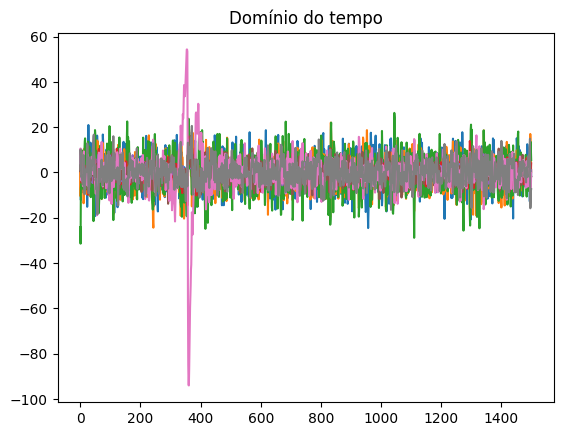

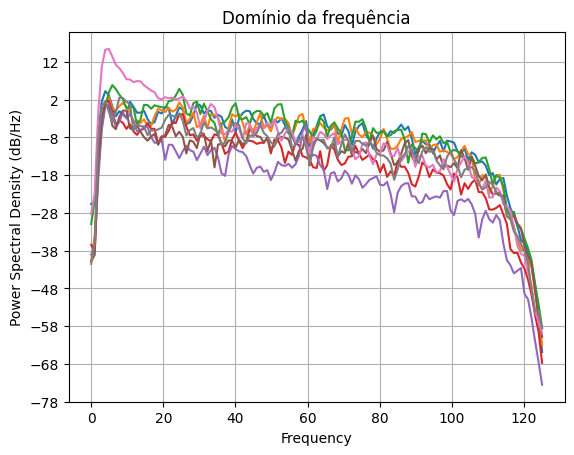

/tmp/ipykernel_7268/1427457285.py:13: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=8).
  plt.specgram(X[i,:], Fs=250)


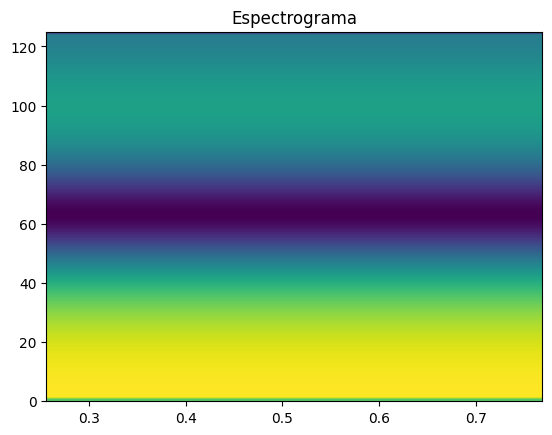

In [17]:
# @ MOMENTO EM QUE O BETA ESTÁ ALTO: 4:16 - 4:22 = 256 - 262
min = 256
max = 262
data = x_tf.get_data(tmin=min,tmax=max)
data = data.transpose() 
print(data.shape)
print_graphs(data)